# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [2]:
import numpy as np
import pandas as pd
from bitalg.visualizer.main import Visualizer
from IPython.display import Markdown as md
import dataframe_image as dfi

# Przydatne funkcje 

In [3]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=30, color='green')
    vis.show()

In [4]:
def draw_line(points_left, points_mid, points_right):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=30, color=['green'])
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.add_point(points_right, s=30, color=['orange'])
    vis.show()

# Generowanie losowych punktów na płaszczyźnie

In [5]:
def generate_uniform_points(left, right, n = 10 ** 5):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """

    points = []
    for i in range(n):
        x = np.random.uniform(left, right)
        y = np.random.uniform(left, right)
        points.append((x, y))

    return points

<span style="color:red">1.</span> Genracja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-1000,1000\right]^{2}$.

In [14]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

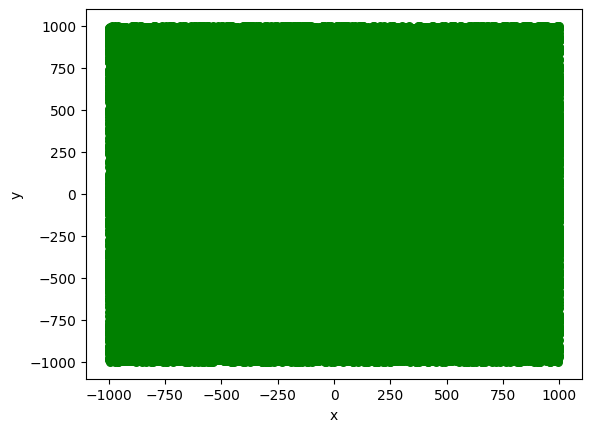

In [15]:
draw_points(points_a)

<span style="color:red">2.</span> Generacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-10^{14},10^{14}\right]^{2}$.

In [16]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

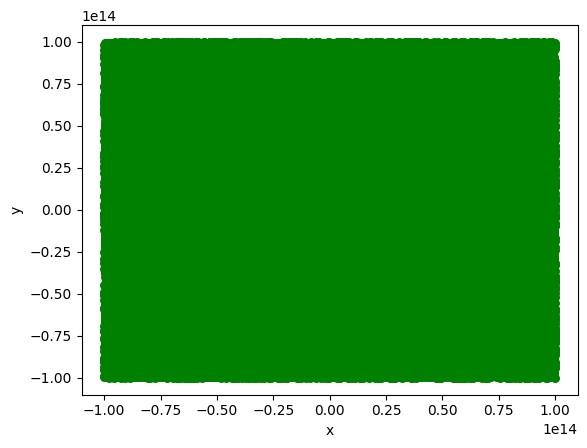

In [17]:
draw_points(points_b)

### Generacja lososwych punktów na okręgu.

In [18]:
def generate_circle_points(O, R, n = 1000):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    points = []
    for _ in range(n):
        angle = 2 * np.pi * np.random.uniform()
        points.append((R * np.cos(angle), R * np.sin(angle)))
    return points

<span style="color:red">3.</span> Generacja $1000$ losowych punktów w przestrzeni $\mathbb{R}^2$ leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

In [19]:
points_c = generate_circle_points((0, 0), 100)

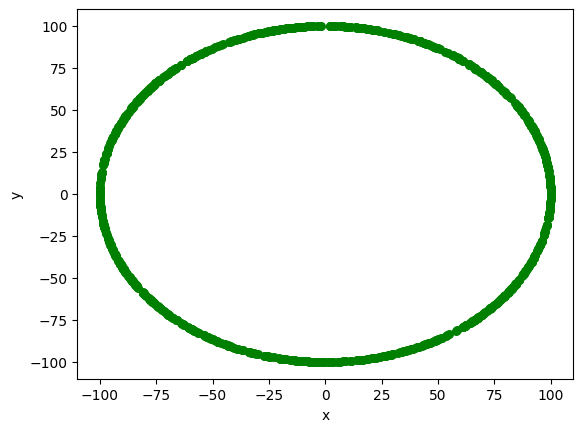

In [206]:
draw_points(points_c)

### Generacja punktów współliniowych.

In [21]:
def generate_collinear_points(a, b, n=100):
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na odcinku ab pomiędzy punktami a i b
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """

    points = []
    xt = b[0] - a[0]
    yt = b[1] - a[1]
    for i in range(n):
        t = np.random.uniform()
        points.append((xt * t + a[0], yt * t + a[1] ))
    
    return points

<span style="color:red">4.</span>  Generacja $ 1000$ losowych punktów w przestrzeni $\mathbb{R}^2$ dla $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$.   
Gdzie $ a = (-1.0, 0.0)$, $ b = (1.0, 0.1)$.

In [22]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1))

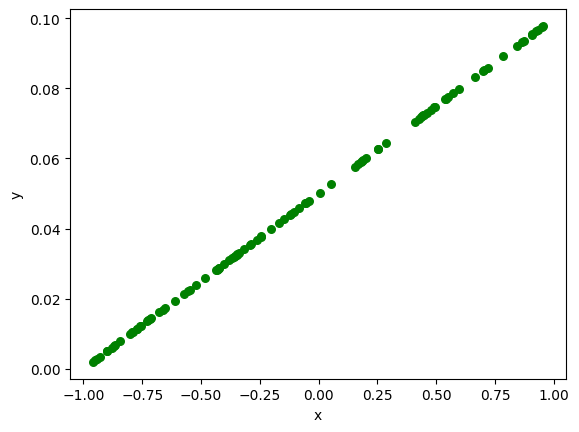

In [23]:
draw_points(points_d)

# Porównanie funkcji wyliczających wyznacznik.

In [6]:
def mat_det_3x3(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return a[0] * (b[1] - c[1]) - a[1] * (b[0] - c[0]) + b[0] * c[1] - b[1] * c[0]

In [7]:
def mat_det_3x3_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    M = np.array([[a[0],a[1], 1],
                  [b[0], b[1], 1],
                  [c[0], c[1], 1]
                  ])

    return np.linalg.det(M)

In [8]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return (a[0] - c[0]) * (b[1] - c[1]) - ((a[1] - c[1]) * (b[0] - c[0]))

In [9]:
def mat_det_2x2_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    M = np.array([[a[0] - c[0], a[1] - c[1]],
                  [b[0] - c[0], b[1] - c[1]]
                  ])
    
    return np.linalg.det(M)

<span style="color:red">5.</span> Implementacja funkcji kategoryzującej punkty odnośnie ich położenia względem prostej.

In [10]:
def categorize_points(points, a, b, mat_det_func, eps):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostek
    """

    categories = [[], [], []]
    for c in points:
        det = mat_det_func(a,b,c)
        if abs(det) < eps: 
            categories[1].append(c)
        elif det > 0:
            categories[0].append(c)
        else:
            categories[2].append(c)

    return categories

In [11]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

#### Wizualizacja sklasyfikowanych punktów. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

<span style="color:red">6.</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-1000,1000\right]^{2}$. $\varepsilon = 10^{-2}$.

In [369]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10**-4)

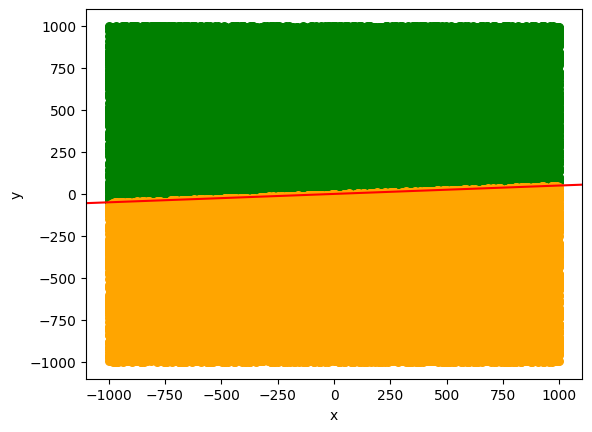

In [370]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [218]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_a_left)))

Punktów po lewej od prostej: 50186

In [219]:
# @hidden_cell
md("Punktów na prostej: {}".format(len(classified_points_a_mid)))

Punktów na prostej: 0

In [220]:
# @hidden_cell
md("Punktów po prawej od prostej: {}".format(len(classified_points_a_right)))

Punktów po prawej od prostej: 49814

<span style="color:red">7.</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-10^{14},10^{14}\right]^{2}$. $\varepsilon = 10^{-4}$.

In [361]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -4)

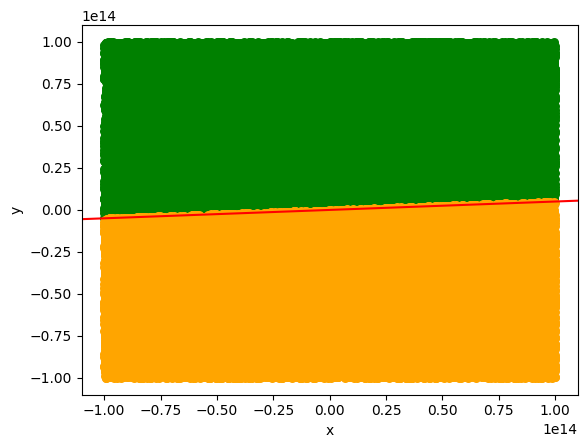

In [362]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [223]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_b_left)))

Punktów po lewej od prostej: 49683

In [363]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_b_mid)))

Punktów na prostej: 0

In [225]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_b_right)))

Punktów po prawej od prostej: 50317

<span style="color:red">8.</span> Kategoryzacja $ 1000$ losowych punktów w przestrzeni $\mathbb{R}^2$ leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. $\varepsilon = 10^{-4}$.

In [226]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10**-4)

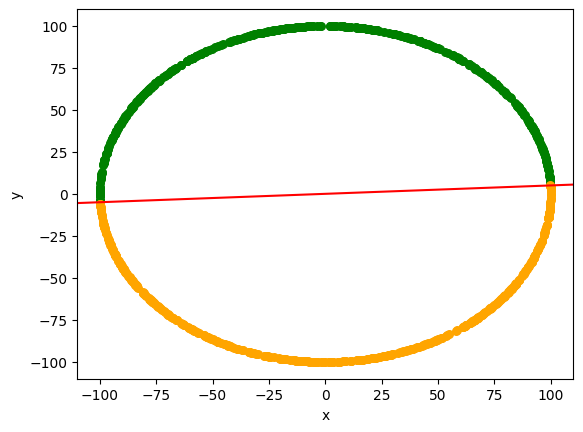

In [227]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [228]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_c_left)))

Punktów po lewej od prostej: 481

In [229]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_c_mid)))

Punktów na prostej: 0

In [230]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_c_right)))

Punktów po prawej od prostej: 519

<span style="color:red">10.</span>  Kategoryzacja $ 1000$ losowych punktów leżących na prostej. $\varepsilon = 10^{-12}$.

In [231]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -12)

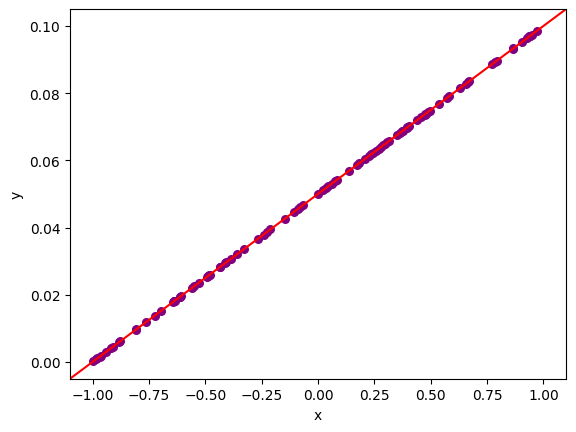

In [232]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [233]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_d_left)))

Punktów po lewej od prostej: 0

In [234]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_d_mid)))

Punktów na prostej: 100

In [235]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_d_right)))

Punktów po prawej od prostej: 0

---

# Testy klasyfikacyjne dla różnych wartości $\varepsilon$.

#### <span style="color:red">1.</span> $\varepsilon = 10^{-8}$.

<span style="color:red">1.1</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-1000,1000\right]^{2}$. $\varepsilon = 10^{-8}$.

In [236]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10**-8)

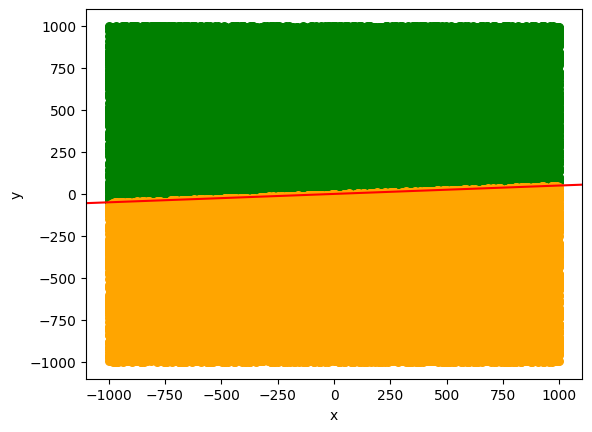

In [237]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [238]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_a_left)))

Punktów po lewej od prostej: 50186

In [239]:
# @hidden_cell
md("Punktów na prostej: {}".format(len(classified_points_a_mid)))

Punktów na prostej: 0

In [240]:
# @hidden_cell
md("Punktów po prawej od prostej: {}".format(len(classified_points_a_right)))

Punktów po prawej od prostej: 49814

<span style="color:red">1.2</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-10^{14},10^{14}\right]^{2}$. $\varepsilon = 10^{-8}$.

In [241]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -8)

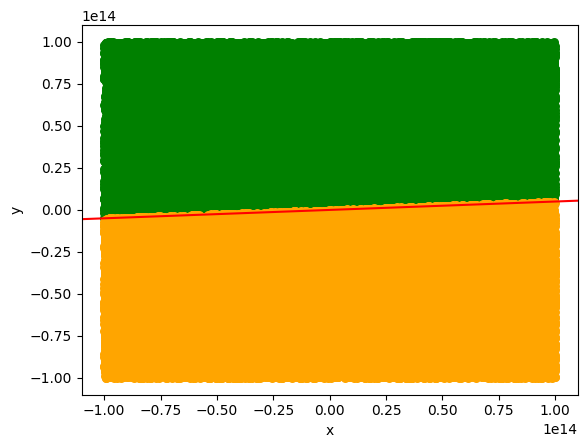

In [242]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [243]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_b_left)))

Punktów po lewej od prostej: 49683

In [244]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_b_mid)))

Punktów na prostej: 0

In [245]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_b_right)))

Punktów po prawej od prostej: 50317

<span style="color:red">1.3</span> Kategoryzacja $ 1000$ losowych punktów w przestrzeni $\mathbb{R}^2$ leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. $\varepsilon = 10^{-8}$.

In [246]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10**-8)

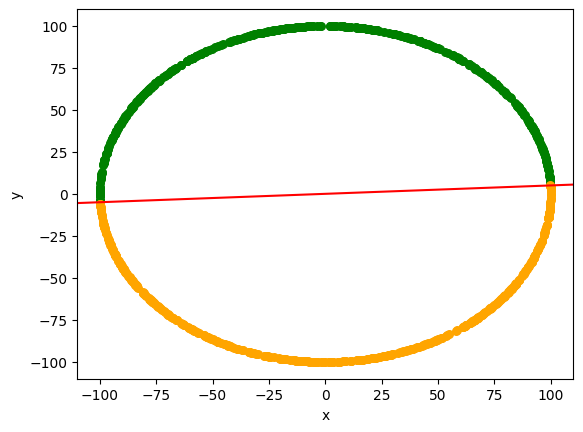

In [247]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [248]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_c_left)))

Punktów po lewej od prostej: 481

In [249]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_c_mid)))

Punktów na prostej: 0

In [250]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_c_right)))

Punktów po prawej od prostej: 519

<span style="color:red">1.4</span>  Kategoryzacja $ 1000$ losowych punktów leżących na prostej.$\varepsilon = 10^{-8}$.

In [251]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -8)

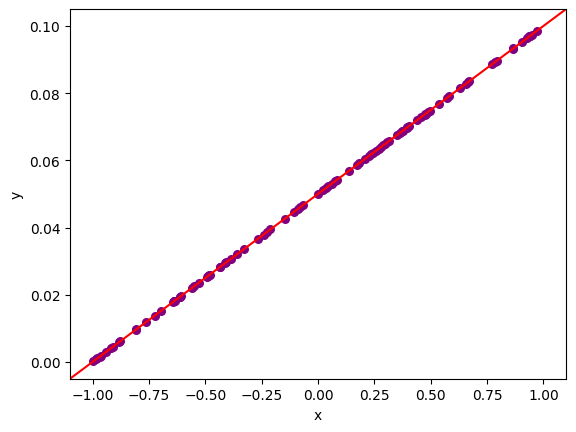

In [252]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [253]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_d_left)))

Punktów po lewej od prostej: 0

In [254]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_d_mid)))

Punktów na prostej: 100

In [255]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_d_right)))

Punktów po prawej od prostej: 0

#### <span style="color:red">2.</span> $\varepsilon = 10^{-10}$.

<span style="color:red">2.1</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-1000,1000\right]^{2}$. $\varepsilon = 10^{-10}$.

In [256]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10**-10)

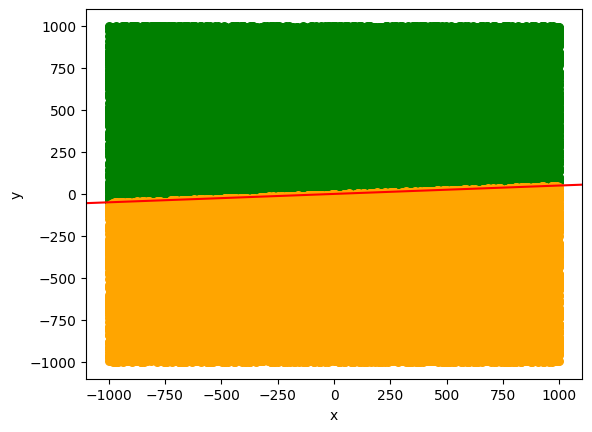

In [257]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [258]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_a_left)))

Punktów po lewej od prostej: 50186

In [259]:
# @hidden_cell
md("Punktów na prostej: {}".format(len(classified_points_a_mid)))

Punktów na prostej: 0

In [260]:
# @hidden_cell
md("Punktów po prawej od prostej: {}".format(len(classified_points_a_right)))

Punktów po prawej od prostej: 49814

<span style="color:red">2.2</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-10^{14},10^{14}\right]^{2}$. $\varepsilon = 10^{-10}$.

In [261]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -10)

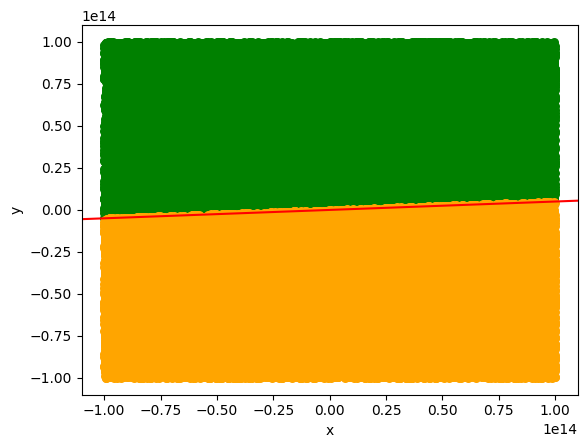

In [262]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [263]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_b_left)))

Punktów po lewej od prostej: 49683

In [264]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_b_mid)))

Punktów na prostej: 0

In [265]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_b_right)))

Punktów po prawej od prostej: 50317

<span style="color:red">2.3</span> Kategoryzacja $ 1000$ losowych punktów w przestrzeni $\mathbb{R}^2$ leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. $\varepsilon = 10^{-10}$.

In [266]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10**-10)

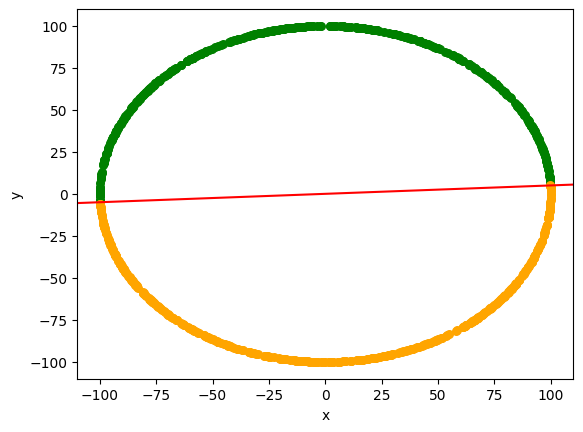

In [267]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [268]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_c_left)))

Punktów po lewej od prostej: 481

In [269]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_c_mid)))

Punktów na prostej: 0

In [270]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_c_right)))

Punktów po prawej od prostej: 519

<span style="color:red">2.4</span>  Kategoryzacja $ 1000$ losowych punktów leżących na prostej. $\varepsilon = 10^{-10}$.

In [271]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -10)

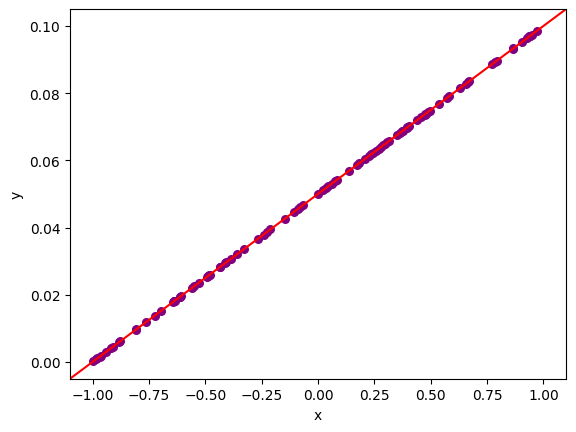

In [272]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [273]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_d_left)))

Punktów po lewej od prostej: 0

In [274]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_d_mid)))

Punktów na prostej: 100

In [275]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_d_right)))

Punktów po prawej od prostej: 0

#### <span style="color:red">3.</span> $\varepsilon = 10^{-12}$.

<span style="color:red">3.1</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-1000,1000\right]^{2}$. $\varepsilon = 10^{-12}$.

In [276]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10**-12)

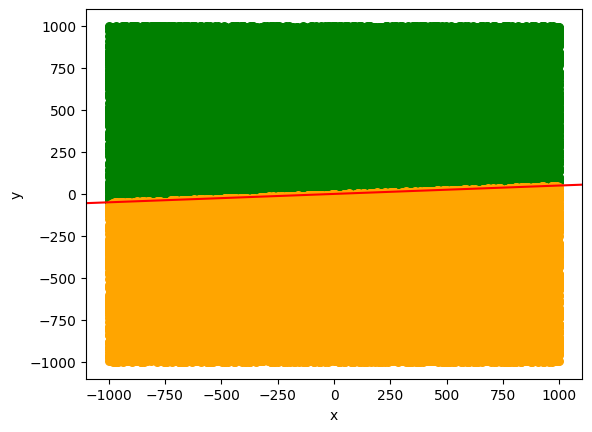

In [277]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [278]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_a_left)))

Punktów po lewej od prostej: 50186

In [279]:
# @hidden_cell
md("Punktów na prostej: {}".format(len(classified_points_a_mid)))

Punktów na prostej: 0

In [280]:
# @hidden_cell
md("Punktów po prawej od prostej: {}".format(len(classified_points_a_right)))

Punktów po prawej od prostej: 49814

<span style="color:red">3.2</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-10^{14},10^{14}\right]^{2}$. $\varepsilon = 10^{-12}$.

In [281]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -12)

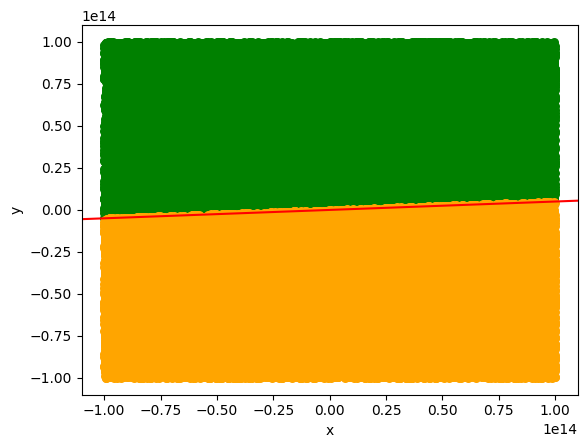

In [282]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [283]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_b_left)))

Punktów po lewej od prostej: 49683

In [284]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_b_mid)))

Punktów na prostej: 0

In [285]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_b_right)))

Punktów po prawej od prostej: 50317

<span style="color:red">3.3</span> Kategoryzacja $ 1000$ losowych punktów w przestrzeni $\mathbb{R}^2$ leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. $\varepsilon = 10^{-12}$.

In [286]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10**-12)

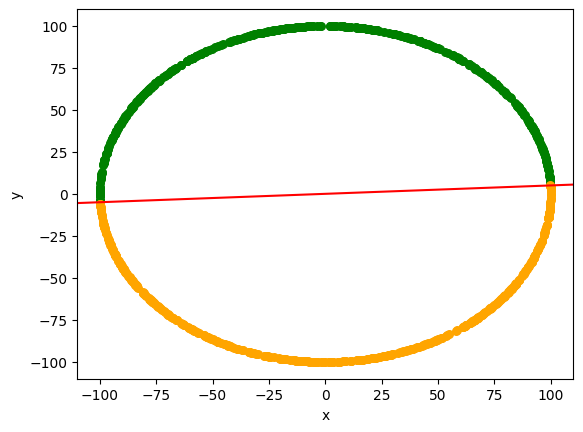

In [287]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [288]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_c_left)))

Punktów po lewej od prostej: 481

In [289]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_c_mid)))

Punktów na prostej: 0

In [290]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_c_right)))

Punktów po prawej od prostej: 519

<span style="color:red">3.4</span>  Kategoryzacja $ 1000$ losowych punktów leżących na prostej. $\varepsilon = 10^{-12}$.

In [291]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -12)

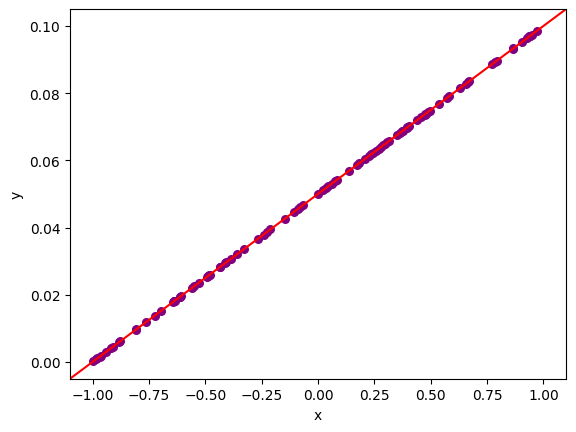

In [292]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [293]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_d_left)))

Punktów po lewej od prostej: 0

In [294]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_d_mid)))

Punktów na prostej: 100

In [295]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_d_right)))

Punktów po prawej od prostej: 0

#### <span style="color:red">4.</span> $\varepsilon = 10^{-14}$.

<span style="color:red">4.1</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-1000,1000\right]^{2}$. $\varepsilon = 10^{-14}$.

In [296]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10**-14)

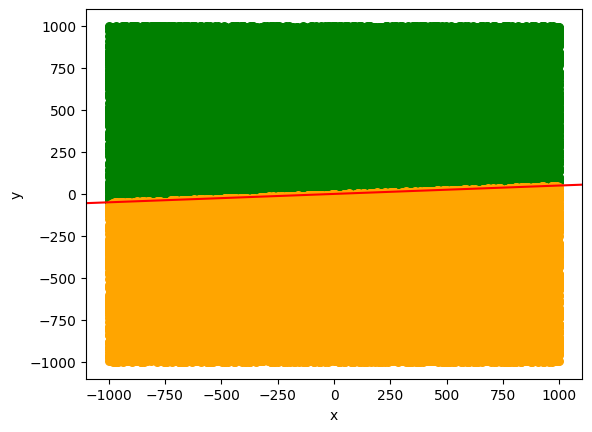

In [297]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [298]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_a_left)))

Punktów po lewej od prostej: 50186

In [299]:
# @hidden_cell
md("Punktów na prostej: {}".format(len(classified_points_a_mid)))

Punktów na prostej: 0

In [300]:
# @hidden_cell
md("Punktów po prawej od prostej: {}".format(len(classified_points_a_right)))

Punktów po prawej od prostej: 49814

<span style="color:red">4.2</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-10^{14},10^{14}\right]^{2}$. $\varepsilon = 10^{-14}$.

In [301]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -14)

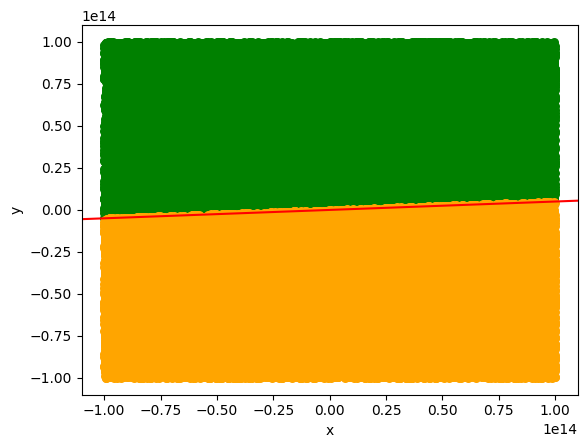

In [302]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [303]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_b_left)))

Punktów po lewej od prostej: 49683

In [304]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_b_mid)))

Punktów na prostej: 0

In [305]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_b_right)))

Punktów po prawej od prostej: 50317

<span style="color:red">4.3</span> Kategoryzacja $ 1000$ losowych punktów w przestrzeni $\mathbb{R}^2$ leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. $\varepsilon = 10^{-14}$.

In [306]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10**-14)

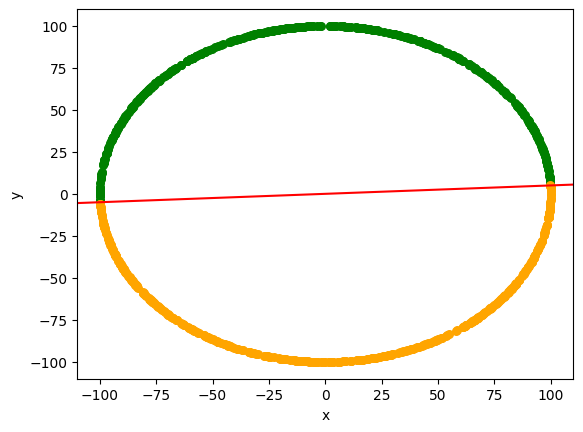

In [307]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [308]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_c_left)))

Punktów po lewej od prostej: 481

In [309]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_c_mid)))

Punktów na prostej: 0

In [310]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_c_right)))

Punktów po prawej od prostej: 519

<span style="color:red">4.4</span>  Kategoryzacja $ 1000$ losowych punktów leżących na prostej. $\varepsilon = 10^{-14}$.

In [311]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -14)

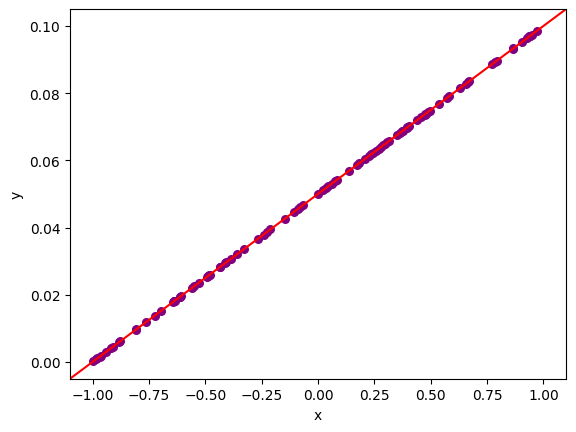

In [312]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [313]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_d_left)))

Punktów po lewej od prostej: 0

In [314]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_d_mid)))

Punktów na prostej: 100

In [315]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_d_right)))

Punktów po prawej od prostej: 0

#### <span style="color:red">5.</span> Tabela

In [66]:
eps = [-4, -8, -12, -14, -16, -18, -20]
def classified_set(points, eps):
    result = []
    for mat in [mat_det_2x2, mat_det_2x2_lib, mat_det_3x3, mat_det_3x3_lib]:    
        res = [[] for _ in range(3)]
        for i in range(len(eps)): 
            classified_left,classified_mid, classified_right = categorize_points(points, a, b, mat, 10 ** eps[i])
            res[0].append(len(classified_left))
            res[1].append(len(classified_mid))
            res[2].append(len(classified_right))
        result += res
        
    return result

In [78]:
results = classified_set(points_d, eps)

In [79]:
row_headers = ["Własny 2x2", " ", " ", "Numpy 2x2", " ", " ", "Własny 3x3" ," ", " ", "Numpy 3x3" ," ", " "]
dataeps = {}
dataeps["eps"] = row_headers
dataeps[""] = ["Punkty po lewej", "Punkty na prostej", "Punkty po prawej"] * 4
for i in range(len(results[0])):
    dataeps[eps[i]] = [results[j][i] for j in range(len(results))]
    # print(datae[eps[i]])

df_eps = pd.DataFrame(data = dataeps)
df_eps

,eps,,-4,-8,-12,-14,-16,-18,-20
0,Własny 2x2,Punkty po lewej,0,0,0,0,0,25,26
1,,Punkty na prostej,100,100,100,100,100,45,43
2,,Punkty po prawej,0,0,0,0,0,30,31
3,Numpy 2x2,Punkty po lewej,0,0,0,0,0,30,32
4,,Punkty na prostej,100,100,100,100,100,34,32
5,,Punkty po prawej,0,0,0,0,0,36,36
6,Własny 3x3,Punkty po lewej,0,0,0,0,0,28,28
7,,Punkty na prostej,100,100,100,100,100,47,47
8,,Punkty po prawej,0,0,0,0,0,25,25
9,Numpy 3x3,Punkty po lewej,0,0,0,0,0,18,18


In [80]:
dfi.export(df_eps, 'eps_compar_d.png')

# Porównywanie czasów klasyfikacji dla różnych funkcji obliczających wyznacznik.

Zbiór testowy ```test_set```.

In [25]:
test_set = generate_uniform_points(-10^4, 10^4, 10 ** 6)

#### <span style="color:red">1.</span> Numpy $2\times 2$. $5,84 [s]$

In [26]:
%%timeit
classified_points_nump2_left,classified_points_nump2_mid,classified_points_nump2_right = categorize_points(test_set, a, b, mat_det_2x2_lib, 10**-4)

5.84 s ± 143 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


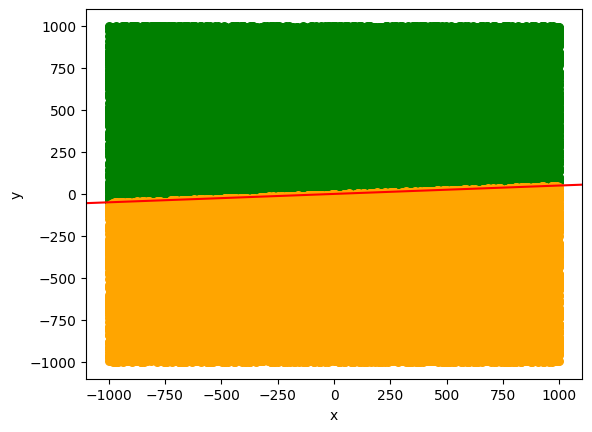

In [322]:
classified_points_nump2_left,classified_points_nump2_mid,classified_points_nump2_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10**-2)
draw_line(classified_points_nump2_left, classified_points_nump2_mid, classified_points_nump2_right)

In [323]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_nump2_left)))

Punktów po lewej od prostej: 50186

In [324]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_nump2_mid)))

Punktów na prostej: 0

In [325]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_nump2_right)))

Punktów po prawej od prostej: 49814

#### <span style="color:red">2.</span> Numpy $3\times 3$. $5,74 [s]$

In [36]:
%%timeit
classified_points_nump3_left,classified_points_nump3_mid,classified_points_nump3_right = categorize_points(test_set, a, b, mat_det_2x2_lib, 10**-4)

5.57 s ± 30.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


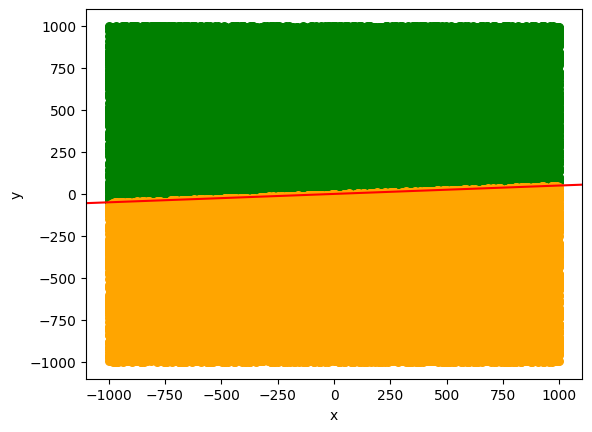

In [327]:
classified_points_nump3_left,classified_points_nump3_mid,classified_points_nump3_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10**-2)
draw_line(classified_points_nump3_left, classified_points_nump3_mid, classified_points_nump3_right)

In [328]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_nump3_left)))

Punktów po lewej od prostej: 50186

In [329]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_nump3_mid)))

Punktów na prostej: 0

In [330]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_nump3_right)))

Punktów po prawej od prostej: 49814

#### <span style="color:red">3.</span> Własny $2\times 2$. $575[ms]$

In [34]:
%%timeit
classified_points_mat2_left,classified_points_mat2_mid,classified_points_mat2_right = categorize_points(test_set, a, b, mat_det_2x2, 10**-4)

400 ms ± 9.16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


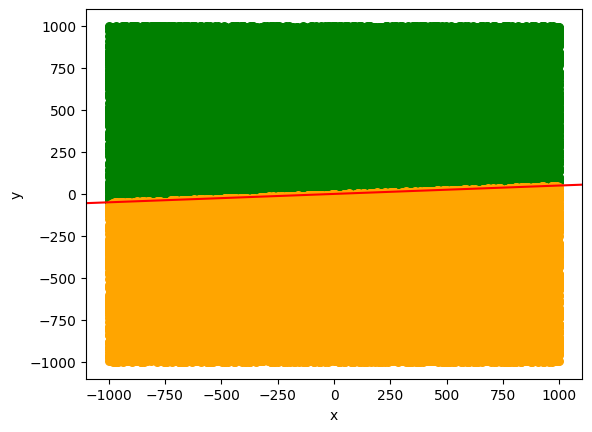

In [332]:
classified_points_mat2_left,classified_points_mat2_mid,classified_points_mat2_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10**-2)
draw_line(classified_points_mat2_left, classified_points_mat2_mid, classified_points_mat2_right)

In [333]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_mat2_left)))

Punktów po lewej od prostej: 50186

In [334]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_mat2_mid)))

Punktów na prostej: 0

In [335]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_mat2_right)))

Punktów po prawej od prostej: 49814

#### <span style="color:red">4.</span> Własny $3\times 3$. $459 [ms]$

In [37]:
%%timeit
classified_points_mat3_left,classified_points_mat3_mid,classified_points_mat3_right = categorize_points(test_set, a, b, mat_det_3x3, 10**-4)

459 ms ± 7.32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


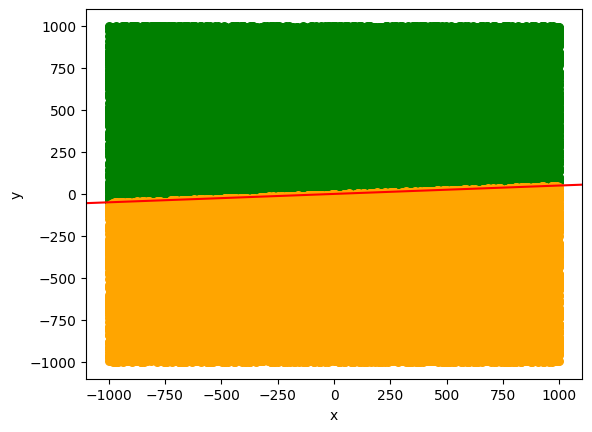

In [337]:
classified_points_mat3_left,classified_points_mat3_mid,classified_points_mat3_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10**-2)
draw_line(classified_points_mat3_left, classified_points_mat3_mid, classified_points_mat3_right)

In [338]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_mat3_left)))

Punktów po lewej od prostej: 50186

In [339]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_mat3_mid)))

Punktów na prostej: 0

In [340]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_mat3_right)))

Punktów po prawej od prostej: 49814

In [341]:
row_headers = ["Zbiór a", " ", " ", "Zbiór b", " ", " ", "Zbiór c" ," ", " ", "Zbiór d" ," ", " "]
res = results
datae = {}
datae["eps"] = row_headers
datae[""] = ["po lewej", "na prostej", "po prawej"] * 4
for i in range(len(res[0])):
    datae[eps[i]] = [res[j][i] for j in range(len(results))]
    # print(datae[eps[i]])

df_eps = pd.DataFrame(data = datae)
df_eps

,eps,,5,3,1,-2,-4,-8,-12,-14,-16,-18,-20
0,Zbiór a,po lewej,0,24995,49942,50186,50186,50186,50186,50186,50186,50186,50186
1,,na prostej,100000,49920,471,0,0,0,0,0,0,0,0
2,,po prawej,0,25085,49587,49814,49814,49814,49814,49814,49814,49814,49814
3,Zbiór b,po lewej,49679,49679,49679,49679,49679,49679,49679,49679,49679,49679,49679
4,,na prostej,7,7,7,7,7,7,7,7,7,7,7
5,,po prawej,50314,50314,50314,50314,50314,50314,50314,50314,50314,50314,50314
6,Zbiór c,po lewej,0,0,461,481,481,481,481,481,481,481,481
7,,na prostej,1000,1000,41,0,0,0,0,0,0,0,0
8,,po prawej,0,0,498,519,519,519,519,519,519,519,519
9,Zbiór d,po lewej,0,0,0,0,0,0,0,0,0,27,29


In [342]:
%%timeit
classified_points_mat3_left,classified_points_mat3_mid,classified_points_mat3_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10**-2)

568 ms ± 9.31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


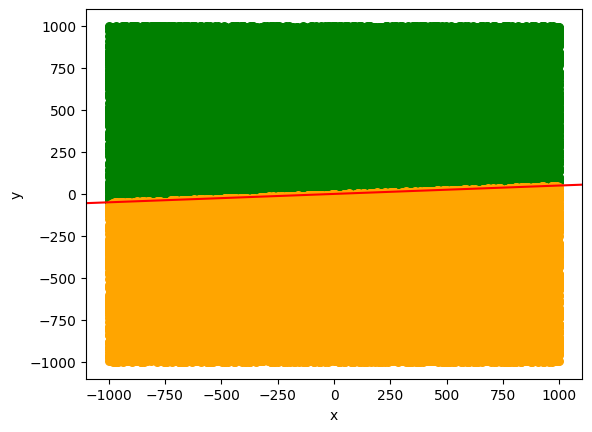

In [343]:
classified_points_mat3_left,classified_points_mat3_mid,classified_points_mat3_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10**-2)
draw_line(classified_points_mat3_left, classified_points_mat3_mid, classified_points_mat3_right)

In [344]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_mat3_left)))

Punktów po lewej od prostej: 50186

In [345]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_mat3_mid)))

Punktów na prostej: 0

In [346]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_mat3_right)))

Punktów po prawej od prostej: 49814

#### <span style="color:red">5.</span> Tabela

In [40]:
row_headers = ["Numpy 2x2", "Numpy 3x3", "Własny 2x2", "Własny 3x3"]
# res = results
data_wyz = {}
data_wyz[" "] = ["Średni czas klasyfikacji [s]"]
data_wyz["Numpy 2x2"] = [5.84]
data_wyz["Numpy 3x3"] = [5.74]
data_wyz["Własny 2x2"] = [0.58]
data_wyz["Własny 3x3"] = [0.46]


df_wyz = pd.DataFrame(data = data_wyz)
df_wyz

,,Numpy 2x2,Numpy 3x3,Własny 2x2,Własny 3x3
0,Średni czas klasyfikacji [s],5.84,5.74,0.58,0.46


In [41]:
dfi.export(df_wyz, 'wyz.png')

# Testy precyzji float64 i float32.

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
W tym celu stworzymy nowy pasujący do ćwiczenia zbiór punktów.

In [349]:
float_test = generate_collinear_points((-1.0, 0.0), (1.0,0.1), 10000)

#### <span style="color:red">1.</span> float64

In [350]:
eps = [-4, -8, -12, -14, -16, -18, -20, -22, -24, -26]
results64 = []
for e in eps: 
    _,classified_points_f64_mid,_ = categorize_points(float_test, a, b, mat_det_2x2_lib, 10 ** e)
    results64.append(len(classified_points_f64_mid))

In [351]:
results64

[10000, 10000, 10000, 10000, 10000, 4049, 3831, 3830, 3830, 3830]

#### <span style="color:red">2.</span> float32

In [352]:
f_float32 = np.float32(float_test)

In [353]:
results32 = []
for e in eps: 
    _,classified_points_f32_mid,_ = categorize_points(f_float32, a, b, mat_det_2x2_lib, 10 ** e)
    results32.append(len(classified_points_f32_mid))

In [354]:
results32

[10000, 10000, 1491, 1491, 1491, 341, 341, 341, 341, 341]

#### <span style="color:red">3.</span> Podsumowanie

In [355]:
row_headers = ["float64", "float32"]
res = [results64] + [results32]

datae = {}
datae["eps"] = row_headers
for i in range(len(res[0])):
    datae[eps[i]] = [res[0][i], res[1][i]]
    print(datae[eps[i]])

df_eps = pd.DataFrame(data = datae)
df_eps

[10000, 10000]
[10000, 10000]
[10000, 1491]
[10000, 1491]
[10000, 1491]
[4049, 341]
[3831, 341]
[3830, 341]
[3830, 341]
[3830, 341]


,eps,-4,-8,-12,-14,-16,-18,-20,-22,-24,-26
0,float64,10000,10000,10000,10000,10000,4049,3831,3830,3830,3830
1,float32,10000,10000,1491,1491,1491,341,341,341,341,341


In [356]:
#dfi.export(df_float, 'eps.png')